# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [20]:
import numpy as np
from types import SimpleNamespace
from inauguralproject import HouseholdSpecializationModelClass
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

Firstly, we assume $L_M, L_F, H_M, H_F \in [\frac{0·24}{48},\frac{1·24}{48}, \frac{2·24}{48}, ... , \frac{48·24}{48}] $

Illustrate how $\frac{H_F}{H_M}$ changes when varying $α∈\{0.25, 0.50, 0.75\}$ and $σ = \{0.5, 1.0, 1.5\}$.


Approach:

1. We define the values of our parameteres, $\alpha$ and $\sigma$.


2. We loop over all the different combinations of $\alpha$ and $\sigma$ values.


3. Then we visualize our results using a heatmap as shown below.



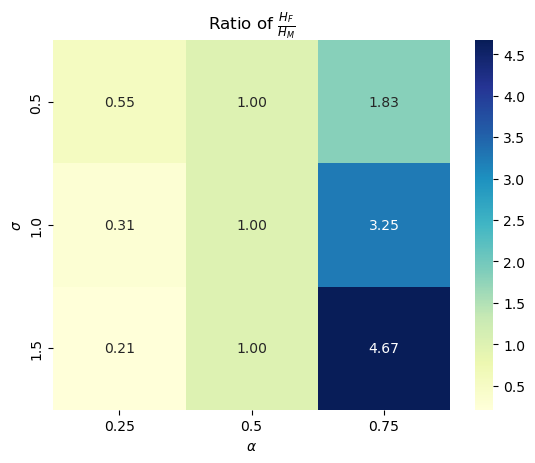

In [21]:
# code for solving the model (remember documentation and comments)

model = HouseholdSpecializationModelClass()

#a. Create list with values of alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5,1.0,1.5]

df = pd.DataFrame(columns=pd.Index(alpha_list, name=r'sigma // alpha'),index=pd.Index(sigma_list, name=""))


for i in alpha_list:
    for j in sigma_list:
        model.par.alpha = i
        model.par.sigma = j
        results = model.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"

# Convert the string values in df to floats
df = df.astype(np.float64)

# Create a heatmap of the ratios with alpha as columns and sigma as rows
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title(r"Ratio of $\frac{H_F}{H_M}$")
plt.xlabel(r"$\alpha$")
plt.ylabel("$\sigma$")
plt.show()



**Code:**

The calc_utility function calculates the consumption of market goods, home production, total consumption utility, and disutility of work, and then returns the difference between the utility and disutility.

The solve_discrete function finds the combination of labor supplied by the husband and wife and the amount of home-produced goods that maximizes the utility of the household. It first generates all possible combinations of labor and home-produced goods, then calculates the utility for each combination using the calc_utility function. If any of the combinations violate the constraint that total hours worked cannot exceed 24, the utility is set to minus infinity. The function then finds the combination that maximizes the utility, saves the values of labor and home-produced goods and returns it.

**Result:**

The table shows values of $\frac{H_{F}}{H_{M}}$ given varying values of $\sigma$ and $\alpha$. $\sigma$ is the elasticity of substitution in home production and $\alpha$ is the productivity in home production of women. We see that $\frac{H_{F}}{H_{M}}$ is decreasing in $\sigma$ for low $\alpha$ and increasing in $\sigma$ for high $\alpha$. 

When alpha is low, it means that the female is less productive than the male in home production. In this case, as sigma increases (i.e., home production becomes more substitutable between male and female), it becomes easier for the male to take over more of the home production tasks, resulting in a decrease in $\frac{H_{F}}{H_{M}}$.

On the other hand, when alpha is high, it means that the female is more productive than the male in home production. In this case, as sigma increases (i.e., home production becomes more substitutable between male and female), it becomes easier for the female to substitute for the male in home production tasks, resulting in an increase in $\frac{H_{F}}{H_{M}}$.

<font color='red'> The table is nice, but please also interpret the results a bit. Remember that alpha is the productivity of women in home production and sigma is the elasticity of substitution in home production - do the results make sense given parameter interpretations?

It is also a good idea to explain in steps how the model is solved. It shows that you understand what's going on, even when you are just running pre-written code.

# Question 2

Plot log $\frac{H_F}{H_M}$ against log $\frac{w_F}{w_M}$ for $w_F \in \{0.8, 0.9, 1.0, 1.1 ,1.2\}$.



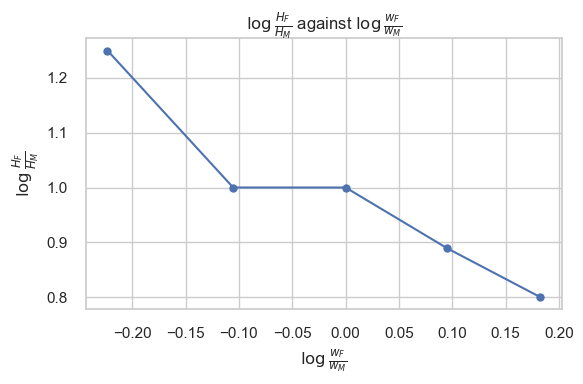

In [136]:
import seaborn as sns
sns.set_style("whitegrid")

model = HouseholdSpecializationModelClass()

alpha = 0.5
sigma = 1
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]

# Create a single figure
fig, ax = plt.subplots(figsize=(6, 4))

results_list = []
for wF in wF_list:
    # Modify the values of alpha, sigma, and wF in the model
    model.par.alpha = alpha
    model.par.sigma = sigma
    model.par.wF = wF
    
    # Solve the model
    results = model.solve_discrete()
    ratio = results.HF / results.HM
    
    results_list.append((alpha, sigma, wF, ratio))

# Plot the results in the figure
wF_arr, ratio_arr = zip(*[r[2:] for r in results_list])
ax.plot(np.log(np.array(wF_arr)/model.par.wM), ratio_arr, marker='o',)

# Set the title and axis labels for the figure
ax.set_title(r'$\log\frac{H_F}{H_M}$ against $\log\frac{w_F}{w_M}$')
ax.set_xlabel(r'$\log\frac{w_F}{w_M}$')
ax.set_ylabel('$\\log\\frac{H_F}{H_M}$')


# Adjust the layout and spacing of the figure
plt.tight_layout()
plt.show()


**Code:**


The code then specifies a list of values for the parameters $\alpha$, $\sigma$, and $w_{F}$ that will be used to solve the model for a range of different parameter values. The results_list variable is initialized as an empty list.

The code then runs three nested loops over the parameter values. It then solves the model using the solve_discrete() method of the model instance.The ratio variable is then computed as the ratio of the female home production to male home production. This ratio is added, along with the current values of $\alpha$, $\sigma$, and $w_{F}$, to the results_list variable.

After all iterations of the loops have completed, the code plots the results. For each $\alpha$ a new plot is produced showing different colored lines for each $\sigma$. The x-axis represents the logarithm of the ratio of female to male market wages $\frac{w_{F}}{w_{M}}$, while the y-axis represents the logarithm of the ratio of female to male home production $\frac{H_{F}}{H_{M}}$.

**Result:**


We see that $\frac{H_{F}}{H_{M}}$ is decreasing in $\frac{w_{F}}{w_{M}}$ in all iterations. This means that as the ratio of female-to-male wages (wF/wM) increases, the ratio of female-to-male home production (HF/HM) tends to decrease. In other words, as women earn a higher wage relative to men, they tend to spend less time in home production relative to men.

Runtime is approx. 16 seconds

<font color='red'> Yes, good solution. I like your plot and how you use different line styles and markers to indicate what has changed compared to the baseline model. However, I think it still get a bit cluttered with line plots in one - maybe you can split it into three subplots and display them next to each other instead?

Once again, please also interpret your results a bit. What is the interpretation of the downwards slope? Here it is completely fine to just focus on the baseline model of alpha=0.5, sigma=1.

# Question 3

It is now assumed that $L_M, L_F, H_M, H_F \in \{0.8, 0.9, 1.0, 1.1, 1.2\}$

Plot log $\frac{H_F}{H_M}$ against log $\frac{w_F}{w_M}$ for $w_F \in \{0.8, 0.9, 1.0, 1.1 ,1.2\}$.


/Users/nicolaimoller/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


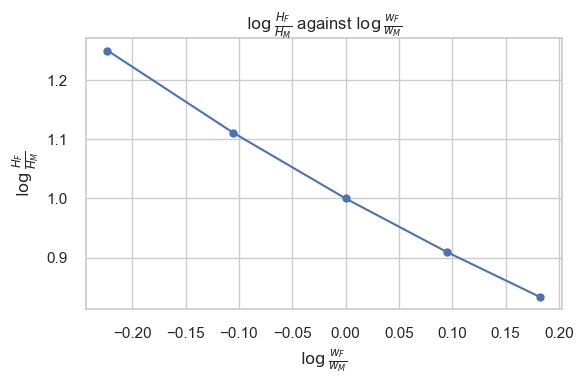

In [137]:
model = HouseholdSpecializationModelClass()

alpha = 0.5
sigma = 1
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]

# Create a single figure
fig, ax = plt.subplots(figsize=(6, 4))

results_list = []
for wF in wF_list:
    # Modify the values of alpha, sigma, and wF in the model
    model.par.alpha = alpha
    model.par.sigma = sigma
    model.par.wF = wF
    
    # Solve the model
    results = model.solve()
    ratio = results.HF / results.HM
    
    results_list.append((alpha, sigma, wF, ratio))

# Plot the results in the figure
wF_arr, ratio_arr = zip(*[r[2:] for r in results_list])
ax.plot(np.log(np.array(wF_arr)/model.par.wM), ratio_arr, marker='o', label=f'$\\sigma={sigma}$')

# Set the title and axis labels for the figure
ax.set_title(r'$\log\frac{H_F}{H_M}$ against $\log\frac{w_F}{w_M}$')
ax.set_xlabel('$\\log\\frac{w_F}{w_M}$')
ax.set_ylabel('$\\log\\frac{H_F}{H_M}$')

# Adjust the layout and spacing of the figure
plt.tight_layout()
plt.show()


**Code:** 
We minimize the objective function: -calc_utility by using the trust-constr method and saves the solution.

**Result:**
The result reflects the results of the previous results. We see that $\frac{H_{F}}{H_{M}}$ is decreasing in $\frac{w_{F}}{w_{M}}$ in all iterations.

<font color='red'> Same comment as question 3: Do the results make sense given the economic interpretation?

Another thing: I have noticed that the SLSQP solver misbehaves a bit in this problem and gives some weird results - my bad for not being aware and alerting you that this could happen. Try to use the trust-constr or nelder-mead instead. This should also give you smooth plots in the continuous case. In general, it can be a good idea to check if results are sensitive to the type of solver used by testing out different methods and comparing the results.

# Opgave 4

Choose $\alpha$ and $\sigma$ such it minimizes $(\beta _0-\hat{\beta}_0)^2 +(\beta _1-\hat{\beta}_1)^2$.  

Illustrate how the model fit the data and discuss the economic interpretation of the results.


In [138]:
model.run_regression()
model.estimate()

/var/folders/y5/92vk92v91bq3wgp1v6sdlc5c0000gn/T/ipykernel_75566/1303887738.py:9: RuntimeWarning: invalid value encountered in divide
  log_HF_HM = np.log(np.array(model.sol.HF_vec) / np.array(model.sol.HM_vec))


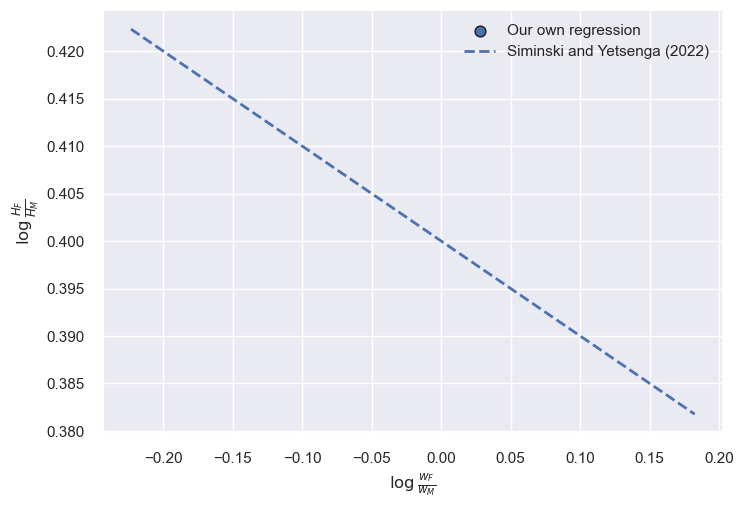

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set()

# Compute log ratios
log_HF_HM = np.log(np.array(model.sol.HF_vec) / np.array(model.sol.HM_vec))
log_wratio = np.log(model.par.wF_vec / model.par.wM)

# Regression line from Siminski and Yetsenga
syr = 0.4 + (-0.1) * log_wratio

# Create figure and axis
fig, ax = plt.subplots()

# Plotting data points with markers
ax.scatter(log_wratio, log_HF_HM, label='Our own regression', marker='o', edgecolors='k', s=60)

# Plot Siminski and Yetsenga's regression line
ax.plot(log_wratio, syr, linestyle='--', label='Siminski and Yetsenga (2022)', lw=2)

# Set axis labels
ax.set_xlabel('$\\log\\frac{w_F}{w_M}$')
ax.set_ylabel('$\\log\\frac{H_F}{H_M}$')

# Add a legend
ax.legend()

# Display the plot
plt.show()


<font color = 'red'> The idea of varying alpha and sigma and comparing regression results is right (and the table is great when formated correctly), but you need to somehow relate this to the results from Siminski&Yetsenga. I suggest the following approach:

* Think a bit about what the economic interpretation of beta0=0.4 and beta1=-0.1 is.  
* Code up a function which takes as an input alpha and sigma, solves the model for the given parameters, and returns regression estimates and squared deviation from S&Y according to the project description.
* Minimize said function using your preferred method, thus giving you estimates of alpha and sigma.
* Comment on the estimates and how that relates to S&Y.

At the very least, you can try to think about which of the combinations in your table that best fits S&Y.

You are welcome to come talk to me if you have questions.

<font color='red'> For question 5, I would encourage you to start simple by making a slight modification to one or a few of the equations. Try to get the code to run without errors. If it is too tricky, try to just write up the equations you modify, how you planned on implement the modification, and what you tried to do to fix the problems. Then I'll give you feedback on that, and you can get some points for showing your approach to problem solving.

# Question 5

In [135]:
Implementer evt lambda her

SyntaxError: invalid syntax (968604507.py, line 1)

Code:




Results:

